In [31]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Read Data
df = pd.read_csv("Data/diabetes_prediction_dataset_cleaned.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,former,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Check For Duplicates

In [33]:
df.duplicated().sum()

np.int64(4868)

There is 4868 Duplicates, so we will drop them, reset the index

In [34]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop_duplicates(keep='first')
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.duplicated().sum()

np.int64(0)

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95132 entries, 0 to 95131
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95132 non-null  object 
 1   age                  95132 non-null  float64
 2   hypertension         95132 non-null  int64  
 3   heart_disease        95132 non-null  int64  
 4   smoking_history      95132 non-null  object 
 5   bmi                  95132 non-null  float64
 6   HbA1c_level          95132 non-null  float64
 7   blood_glucose_level  95132 non-null  int64  
 8   diabetes             95132 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.5+ MB


In [36]:
df_cleaned.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,95132.000000,95132.000000,95132.000000,95132.000000,95132.000000,95132.000000,95132.000000
mean,41.801078,0.078302,0.041206,27.322020,5.534195,138.247992,0.088982
std,22.460748,0.268647,0.198767,6.803327,1.073763,40.955830,0.284719
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.330000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.930000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Show Values of classes which should have some certain values

In [37]:
#Check For Impossible Values
print(df_cleaned['diabetes'].value_counts())
print("=====================")
print(df_cleaned['gender'].value_counts())
print("=====================")
print(df_cleaned["heart_disease"].value_counts())
print("=====================")
print(df_cleaned["hypertension"].value_counts())
print("=====================")
print(df_cleaned["smoking_history"].value_counts())

diabetes
0    86667
1     8465
Name: count, dtype: int64
gender
Female    55570
Male      39544
Other        18
Name: count, dtype: int64
heart_disease
0    91212
1     3920
Name: count, dtype: int64
hypertension
0    87683
1     7449
Name: count, dtype: int64
smoking_history
never          51405
former         19881
current         9680
ever            7627
not current     6539
Name: count, dtype: int64


Drop Other from gender as it is small porportion of the data

In [38]:
df_cleaned = df_cleaned[df_cleaned['gender'] != 'Other']
df_cleaned['gender'].value_counts()

gender
Female    55570
Male      39544
Name: count, dtype: int64

In [39]:
df_cleaned['diabetes'].value_counts()

diabetes
0    86649
1     8465
Name: count, dtype: int64

In [40]:
df_cleaned[df_cleaned['age'] != df_cleaned['age'].astype(int)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,never,14.43,6.5,160,0
218,Female,0.56,0,0,never,16.85,5.0,140,0
241,Male,0.88,0,0,never,17.49,6.0,140,0
268,Female,0.16,0,0,never,12.15,6.6,100,0
396,Male,0.16,0,0,never,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...
94712,Female,0.40,0,0,never,16.66,3.5,140,0
94799,Female,0.64,0,0,never,17.58,6.1,140,0
94934,Female,0.32,0,0,never,12.26,5.8,126,0
95056,Female,0.32,0,0,never,18.37,3.5,80,0


As the age values that have floating numbers are between 0.08 and 1.48 which refers to childs we will keep them for now

Now let's show the postive-negative porpotions of the dataset

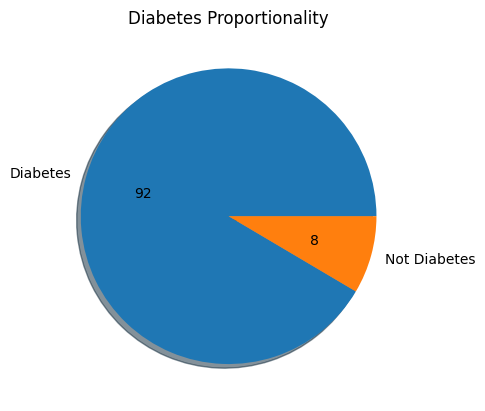

In [41]:
plt.pie(df.diabetes.value_counts(), 
        labels= ['Diabetes', 'Not Diabetes'], 
        autopct='%.f', shadow=True)
plt.title('Diabetes Proportionality')
plt.show()

Now let's see if there is any outliers By box plot visualization for positive and negative results seperately as each category would have its own set of outliers

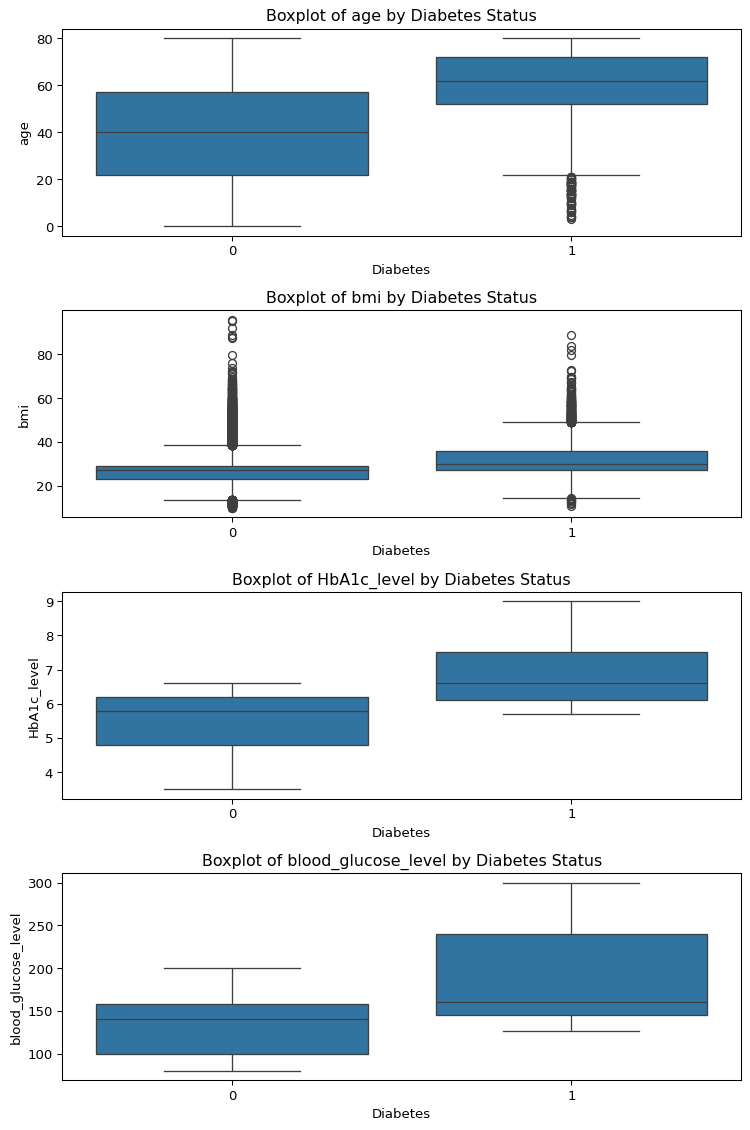

In [42]:
specific_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(len(specific_cols), 1, figsize=(8, 12), dpi=95)

for i, col in enumerate(specific_cols):
    sns.boxplot(x='diabetes', y=col, data=df_cleaned, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} by Diabetes Status')
    axs[i].set_xlabel('Diabetes')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

There is no Outliers in HbA1c_level, blood_glucose_level, and age in neagtive results, but there is outliers in BMI and age in positive results

We will make the outliers as nulls

In [43]:
df_outlier_handled = df_cleaned.copy()

# Handle 'age' outliers only for diabetes == 1
col = 'age'
cls = 1
cls_data = df_outlier_handled[df_outlier_handled['diabetes'] == cls]
Q1 = cls_data[col].quantile(0.25)
Q3 = cls_data[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_outlier_handled.loc[(df_outlier_handled['diabetes'] == cls) & 
                       ((df_outlier_handled[col] < lower) | (df_outlier_handled[col] > upper)), col] = np.nan


# Handle 'bmi' outliers for both classes
col = 'bmi'
for cls in df_outlier_handled['diabetes'].unique():
    cls_data = df_outlier_handled[df_outlier_handled['diabetes'] == cls]
    Q1 = cls_data[col].quantile(0.25)
    Q3 = cls_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_outlier_handled.loc[(df_outlier_handled['diabetes'] == cls) & 
                           ((df_outlier_handled[col] < lower) | (df_outlier_handled[col] > upper)), col] = np.nan

Seeing how many outliers we have

In [44]:
df_outlier_handled['age'].isnull().sum()

np.int64(118)

In [45]:
df_outlier_handled['bmi'].isnull().sum()

np.int64(4954)

In [46]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,former,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95114 entries, 0 to 95131
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95114 non-null  object 
 1   age                  95114 non-null  float64
 2   hypertension         95114 non-null  int64  
 3   heart_disease        95114 non-null  int64  
 4   smoking_history      95114 non-null  object 
 5   bmi                  95114 non-null  float64
 6   HbA1c_level          95114 non-null  float64
 7   blood_glucose_level  95114 non-null  int64  
 8   diabetes             95114 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


Imputing the null values which was the outliers using median impputation

In [48]:
# Impute the NaNs (from outlier removal) using median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_outlier_handled[['age', 'bmi']] = imputer.fit_transform(df_outlier_handled[['age', 'bmi']])

df_cleaned = df_outlier_handled


In [49]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,former,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Show the outliers now after the imputation

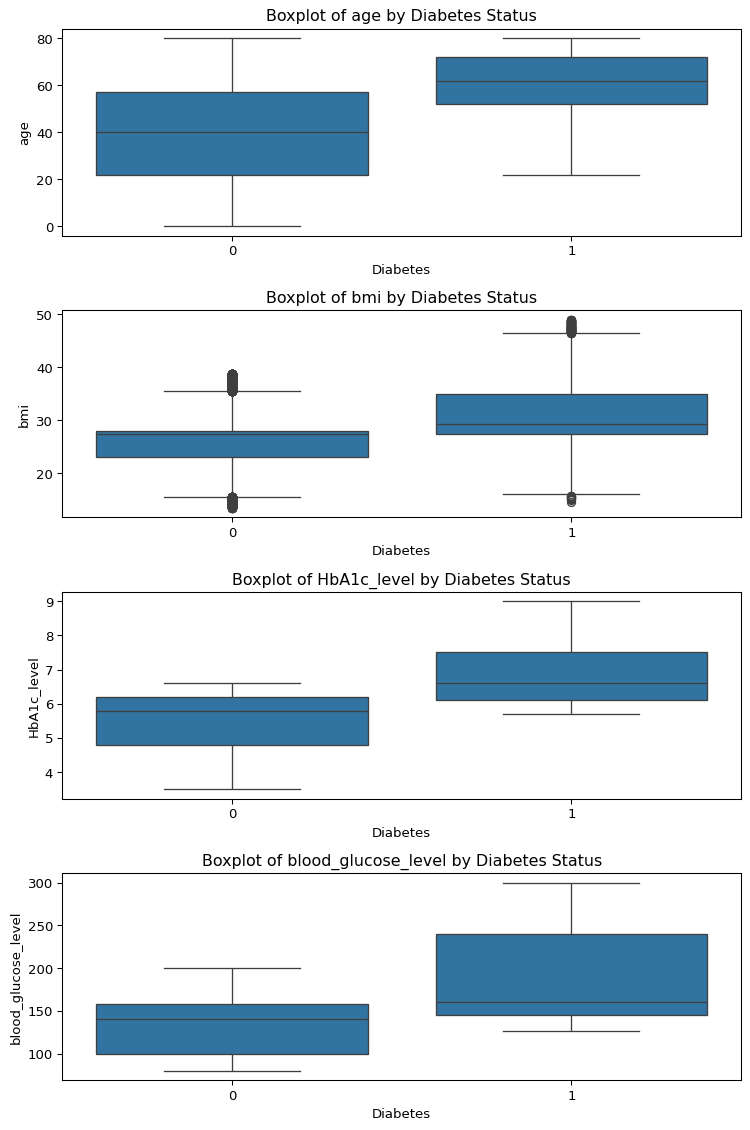

In [51]:
specific_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(len(specific_cols), 1, figsize=(8, 12), dpi=95)

for i, col in enumerate(specific_cols):
    sns.boxplot(x='diabetes', y=col, data=df_cleaned, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} by Diabetes Status')
    axs[i].set_xlabel('Diabetes')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

As we can see no more outliers in age. But new outliers in BMI

Now let's encode the genders and smoking_history

In [52]:
df_cleaned.to_csv("Data/diabetes_prediction_dataset_cleaned_imputed_outliers_and_smoking.csv", index=False)

In [53]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,former,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [54]:
df_cleaned['gender'] = df_cleaned['gender'].map({'Male': 0, 'Female': 1})

df_cleaned['smoking_history'] = df_cleaned['smoking_history'].map({
    'never': 0,
    'not current': 1,
    'former': 2,
    'ever': 3,
    'current': 4
})


Now we will do correlation analysis and calculate teh correlation between each feature and daibetes

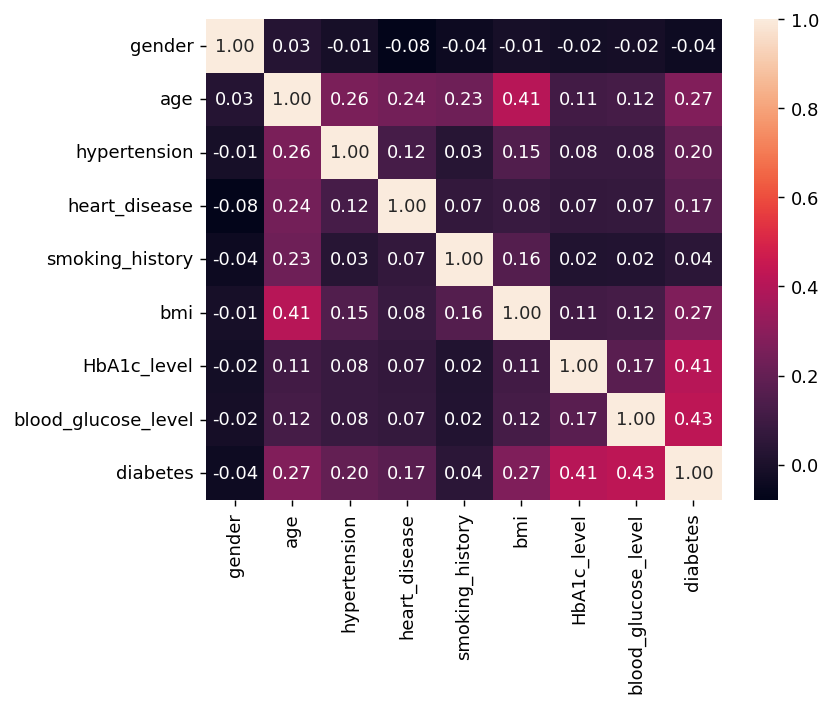

diabetes               1.000000
blood_glucose_level    0.425678
HbA1c_level            0.407831
age                    0.271051
bmi                    0.269666
hypertension           0.195435
heart_disease          0.170540
smoking_history        0.044645
gender                -0.038257
Name: diabetes, dtype: float64

In [55]:
#correlation
corr = df_cleaned.corr()

plt.figure(dpi=130)
sns.heatmap(df_cleaned.corr(), annot=True, fmt= '.2f')
plt.show()
corr['diabetes'].sort_values(ascending = False)


As you can see the diabetes is positively and moderately correlated with blood glucose level and HbA1c_level, Weakly and positively correlated with age, bmi, hypertension, and heart_disease. It is also very weakly correlated with smoking history (positve correlation) and gender (negative correlation)

We will check normality of the features

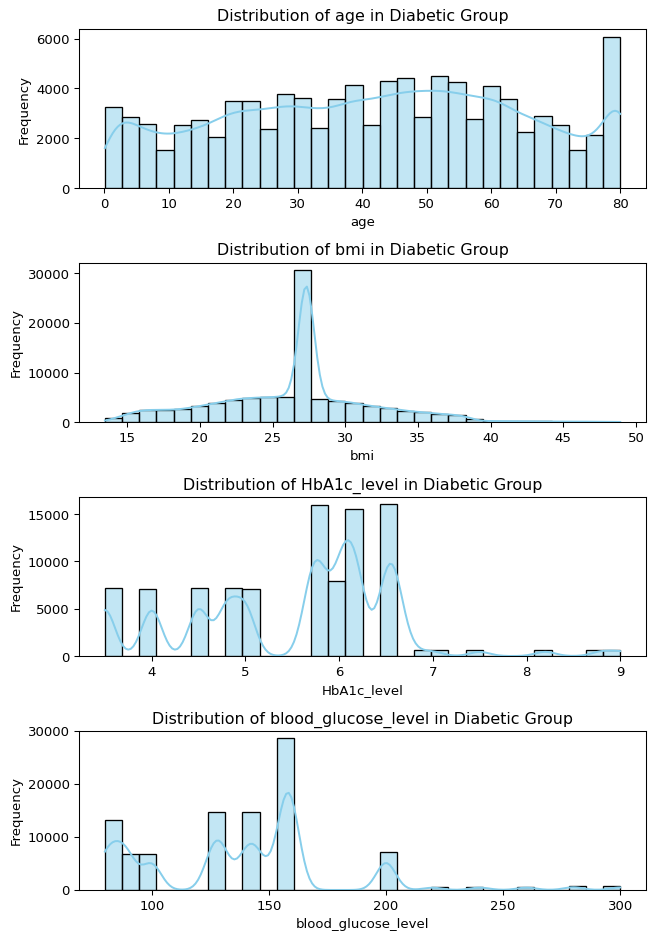

In [56]:
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
for i, col in enumerate(specific_cols):
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue', ax=axs[i])
    axs[i].set_title(f"Distribution of {col} in Diabetic Group")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


BMI is the only one that is normally distributed feature

Now let's do Feature importance Analysis using randomforest

In [57]:
from sklearn.ensemble import RandomForestClassifier

X = df_cleaned.drop(columns='diabetes')
y = df_cleaned['diabetes']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")


gender: 0.005
age: 0.092
hypertension: 0.012
heart_disease: 0.009
smoking_history: 0.019
bmi: 0.173
HbA1c_level: 0.380
blood_glucose_level: 0.310


According to the Feature Importance analysis we can see that the diabetes result mostly depends on blood_glucose_level, HbA1c_level, and bmi